In [1]:
 import tensorflow as tf
 print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2021-01-18 09:26:37--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  2.87MB/s    in 0.2s    

2021-01-18 09:26:38 (2.87 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns = ["label", "data"]

In [10]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df["b_labels"] = df["label"].map({"ham": 0, "spam": 1})
Y = df["b_labels"].values

In [14]:
df_train, df_test, Ytrain, Ytest = train_test_split(df["data"], Y, test_size=0.33)

In [15]:
df_train.shape, Ytrain.shape, df_test.shape, Ytest.shape

((3733,), (3733,), (1839,), (1839,))

In [17]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [19]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"found {V} unique words")

found 7073 unique words


In [20]:
data_train = pad_sequences(sequences_train)
print("shape of the train dataset:", data_train.shape)

T = data_train.shape[1]

shape of the train dataset: (3733, 189)


In [21]:
data_test = pad_sequences(sequences_test, maxlen=T)
print("shape of the test dataset:", data_test.shape)

shape of the test dataset: (1839, 189)


In [22]:
D = 20

i = Input(shape=(T,))
x = Embedding(input_dim=V + 1, output_dim=D)(i)
x = Conv1D(filters=32, kernel_size=3, activation=tf.keras.activations.relu)(x)
x = MaxPooling1D(3)(x)
x = Conv1D(filters=64, kernel_size=3, activation=tf.keras.activations.relu)(x)
x = MaxPooling1D(3)(x)
x = Conv1D(filters=128, kernel_size=3, activation=tf.keras.activations.relu)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

print("Training model...")
r = model.fit(x=data_train, y=Ytrain, 
              epochs=5, 
              validation_data=(data_test, Ytest))

Training model...
Epoch 1/5
117/117 [==============================] - 9s 11ms/step - loss: 0.4848 - accuracy: 0.8317 - val_loss: 0.2828 - val_accuracy: 0.8668
Epoch 2/5
117/117 [==============================] - 1s 6ms/step - loss: 0.2021 - accuracy: 0.9044 - val_loss: 0.1006 - val_accuracy: 0.9744
Epoch 3/5
117/117 [==============================] - 1s 6ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0878 - val_accuracy: 0.9782
Epoch 4/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0886 - val_accuracy: 0.9826
Epoch 5/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9826


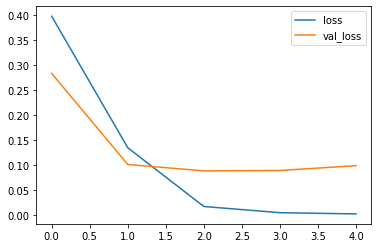

In [23]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

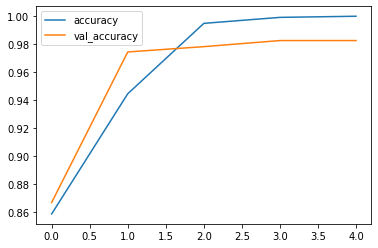

In [24]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()